In [1]:
import numpy as np
import nibabel as nib
import nilearn as nil
import matplotlib.pyplot as plt

from nilearn.datasets import fetch_atlas_aal

In [5]:
data = fetch_atlas_aal(data_dir="data/")


Dataset created in data/aal_SPM12



 ...done. (6 seconds, 0 min)
Extracting data from data/aal_SPM12/9845813e2300e5b614a9dd2713e13445/aal_for_SPM12.tar.gz..... done.


In [25]:
a_img = nib.load(data.maps)
a = a_img.get_fdata()

In [15]:
a.shape

(91, 109, 91)

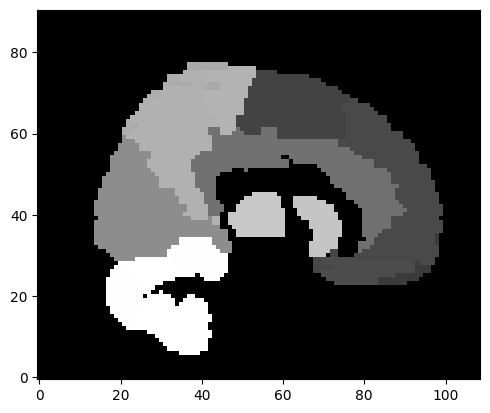

In [14]:
plt.imshow(a[40,:,:].T, origin="lower", cmap="gray")

In [24]:
x_img = nib.load("data/AD/mwp1ADNI_002_S_0729_MR_MT1__GradWarp__N3m_Br_20120322163605283_S89463_I291876.nii.gz")
x = x_img.get_fdata()

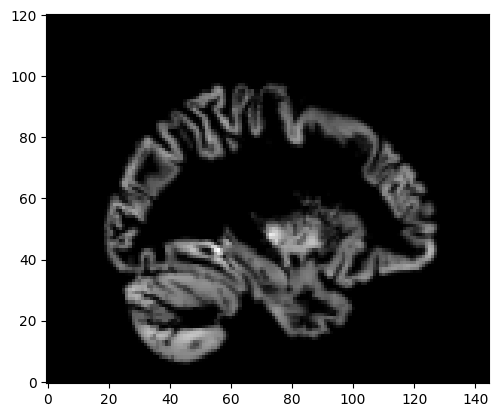

In [19]:
plt.imshow(x[40,:,:].T, origin="lower", cmap="gray")

In [92]:
# use interpolation nearest to keep the AAL labels!
a2_img = nilearn.image.resample_to_img(a_img, x_img, interpolation="nearest")
a2 = a2_img.get_fdata()

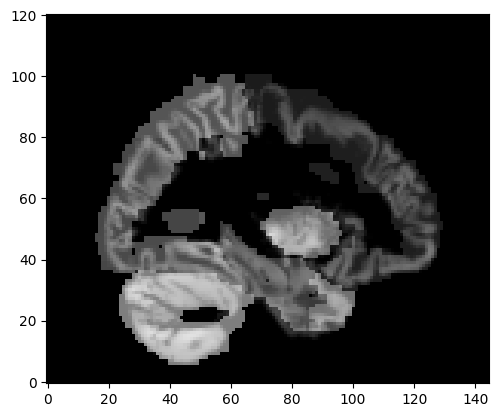

In [93]:
plt.imshow(x[40,:,:].T, origin="lower", cmap="gray")
plt.imshow(a2_img.get_fdata()[40,:,:].T, origin="lower", cmap="gray", alpha=0.5)

In [109]:
hippo_idx = int(data.indices[data.labels.index('Hippocampus_L')])
mask = (a2 == hippo_idx)

In [112]:
np.unique(mask)

array([False,  True])

In [114]:
masked = mask * x

In [119]:
np.unique(mask[70,:,:])

array([False,  True])

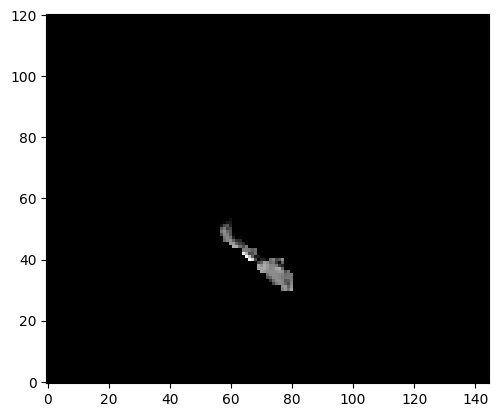

In [122]:
plt.imshow(masked[75,:,:].T, cmap="binary_r", origin="lower")

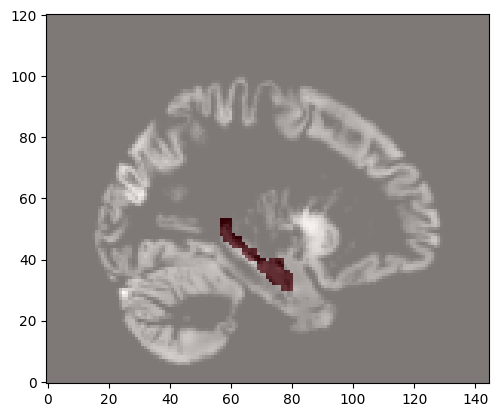

In [127]:
plt.imshow(x[75,:,:].T, cmap="binary_r", origin="lower")
plt.imshow(mask[75,:,:].T, cmap="Reds", origin="lower", alpha=0.5)

In [128]:
x_img.affine

array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,    1. ]])

In [131]:
# same affine, except scale
a_img.affine

array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [136]:
121/91

1.3296703296703296

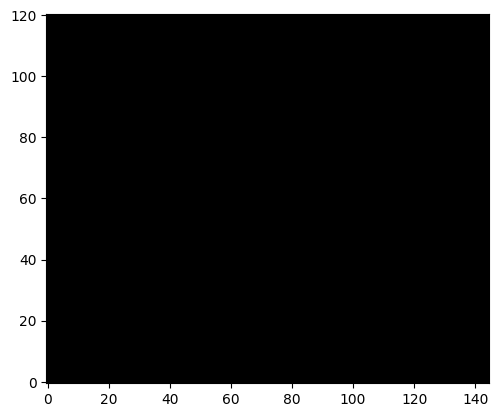

In [105]:
plt.imshow(masked[53,:,:].T, cmap="gray", origin="lower")

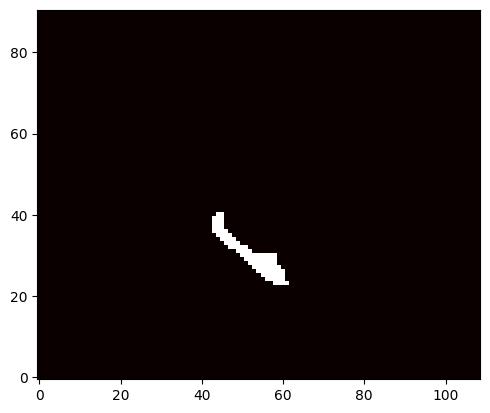

In [75]:
plt.imshow((a == 4101)[57,:,:].T, cmap="hot", origin="lower")

In [21]:
import nilearn.datasets

In [26]:
import nilearn.image

In [62]:
np.unique(a == 4101)

array([False,  True])

In [89]:
np.unique(a2_img.get_fdata())

array([   0., 2001., 2002., 2101., 2102., 2111., 2112., 2201., 2202.,
       2211., 2212., 2301., 2302., 2311., 2312., 2321., 2322., 2331.,
       2332., 2401., 2402., 2501., 2502., 2601., 2602., 2611., 2612.,
       2701., 2702., 3001., 3002., 4001., 4002., 4011., 4012., 4021.,
       4022., 4101., 4102., 4111., 4112., 4201., 4202., 5001., 5002.,
       5011., 5012., 5021., 5022., 5101., 5102., 5201., 5202., 5301.,
       5302., 5401., 5402., 6001., 6002., 6101., 6102., 6201., 6202.,
       6211., 6212., 6221., 6222., 6301., 6302., 6401., 6402., 7001.,
       7002., 7011., 7012., 7021., 7022., 7101., 7102., 8101., 8102.,
       8111., 8112., 8121., 8122., 8201., 8202., 8211., 8212., 8301.,
       8302., 9001., 9002., 9011., 9012., 9021., 9022., 9031., 9032.,
       9041., 9042., 9051., 9052., 9061., 9062., 9071., 9072., 9081.,
       9082., 9100., 9110., 9120., 9130., 9140., 9150., 9160., 9170.])